# Cifar 10

In [33]:
# 라이브러리 준비
import tensorflow as tf

In [34]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 원핫 인코딩 수행
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [49]:
# 모델 생성

X = tf.keras.Input([32, 32, 3])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dropout(0.5)(H) 
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dropout(0.5)(H) 
H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dropout(0.5)(H) 
H = tf.keras.layers.Dense(32)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_17 (Flatten)        (None, 3072)              0         
                                                                 
 dense_78 (Dense)            (None, 256)               786688    
                                                                 
 batch_normalization_58 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_40 (Activation)  (None, 256)               0         
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                          

In [53]:
# 모델 생성

X = tf.keras.Input([32, 32, 3])
H = tf.keras.layers.Flatten()(X)

H = tf.keras.layers.Dense(256)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dropout(0.5)(H) 
H = tf.keras.layers.Dense(128)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dropout(0.5)(H) 
H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

H = tf.keras.layers.Dropout(0.5)(H) 
H = tf.keras.layers.Dense(32)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation("swish")(H)

Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X,Y)
model.compile(
            loss=tf.keras.losses.categorical_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=tf.keras.metrics.categorical_accuracy
            )
model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 flatten_18 (Flatten)        (None, 3072)              0         
                                                                 
 dense_83 (Dense)            (None, 256)               786688    
                                                                 
 batch_normalization_62 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 activation_44 (Activation)  (None, 256)               0         
                                                                 
 dropout_34 (Dropout)        (None, 256)               0         
                                                          

In [54]:
# 콜백함수 만들기
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        min_delta = 0, # 이보다 작게 변하면 변한다고 안할거임.
                                        patience = 10, # 이 회수(epoch)동안 개선이 없으면 끝냄
                                        restore_best_weights=True)
# 모델 학습
result = model.fit(x_train,
                   y_train, 
                   epochs=1000, 
                   batch_size=128, 
                   validation_split=0.2, 
                   callbacks=[early])

Epoch 1/1000
313/313 [==============================] - 8s 20ms/step - loss: 2.0154 - categorical_accuracy: 0.2680 - val_loss: 1.8133 - val_categorical_accuracy: 0.3347
Epoch 2/1000
313/313 [==============================] - 6s 19ms/step - loss: 1.8092 - categorical_accuracy: 0.3465 - val_loss: 1.6964 - val_categorical_accuracy: 0.3858
Epoch 3/1000
313/313 [==============================] - 6s 19ms/step - loss: 1.7323 - categorical_accuracy: 0.3733 - val_loss: 1.7107 - val_categorical_accuracy: 0.3991
Epoch 4/1000
313/313 [==============================] - 6s 21ms/step - loss: 1.6809 - categorical_accuracy: 0.3941 - val_loss: 1.6805 - val_categorical_accuracy: 0.4027
Epoch 5/1000
313/313 [==============================] - 6s 19ms/step - loss: 1.6444 - categorical_accuracy: 0.4101 - val_loss: 1.6792 - val_categorical_accuracy: 0.3962
Epoch 6/1000
313/313 [==============================] - 7s 21ms/step - loss: 1.6068 - categorical_accuracy: 0.4235 - val_loss: 1.8051 - val_categorical_acc

In [55]:
# 모델 평가하기
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4000 - categorical_accuracy: 0.5009


[1.4000221490859985, 0.5008999705314636]

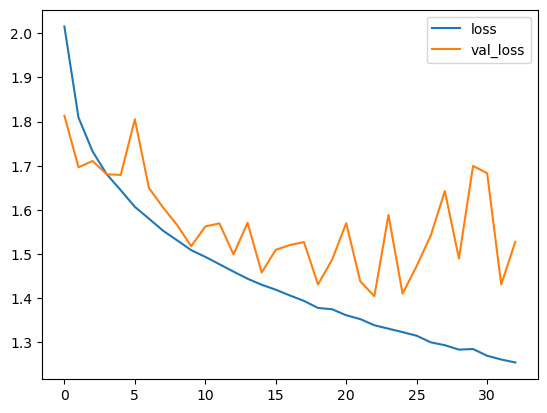

KeyError: 'accuracy'

In [57]:
# 학습 시각화
import matplotlib.pyplot as plt

plt. plot(result.history['loss'])
plt. plot(result.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt. plot(result.history['accuracy'])
plt. plot(result.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()